In [2]:
import datetime
import pandas as pd
def parser(x):
    return datetime.datetime.strptime(x,'%m/%d/%Y')

data = pd.read_csv("AMZN.csv", header=0, parse_dates=[0], date_parser=parser)

In [3]:
data.head(5)

,Date,Open,High,Low,Adj Close,Volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,Fourier,ARIMA,Close,labels
0,2010-01-04,136.250000,136.610001,133.139999,133.899994,7599900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.899994,NaN
1,2010-01-05,133.429993,135.479996,131.809998,134.690002,8851900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.690002,NaN
2,2010-01-06,134.600006,134.729996,131.649994,132.250000,7178800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.250000,NaN
3,2010-01-07,132.009995,132.320007,128.800003,130.000000,11030200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.000000,NaN
4,2010-01-08,130.559998,133.679993,129.029999,133.520004,9830500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.520004,NaN


In [4]:
data.describe()

,Open,High,Low,Adj Close,Volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,Fourier,ARIMA,Close,labels
count,2265.000000,2265.000000,2265.000000,2265.000000,2.265000e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2265.000000,0.0
mean,553.000949,558.568702,546.430821,552.743179,4.603646e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,552.743179,NaN
std,470.155920,474.660681,463.993737,469.357785,2.954860e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,469.357785,NaN
min,105.930000,111.290001,105.800003,108.610001,9.844000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.610001,NaN
25%,217.649994,219.979996,214.460007,217.830002,2.786500e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.830002,NaN
50%,334.679993,336.760010,328.940002,332.910004,3.872500e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332.910004,NaN
75%,766.599976,771.219971,761.200012,767.330017,5.425000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,767.330017,NaN
max,2038.109985,2050.500000,2013.000000,2039.510010,4.242110e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2039.510010,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 20 columns):
Date          2265 non-null datetime64[ns]
Open          2265 non-null float64
High          2265 non-null float64
Low           2265 non-null float64
Adj Close     2265 non-null float64
Volume        2265 non-null int64
ma7           0 non-null float64
ma21          0 non-null float64
26ema         0 non-null float64
12ema         0 non-null float64
MACD          0 non-null float64
20sd          0 non-null float64
upper_band    0 non-null float64
lower_band    0 non-null float64
ema           0 non-null float64
momentum      0 non-null float64
Fourier       0 non-null float64
ARIMA         0 non-null float64
Close         2265 non-null float64
labels        0 non-null float64
dtypes: datetime64[ns](1), float64(18), int64(1)
memory usage: 354.0 KB


## Data Preprocessing

In [6]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time

In [7]:
data = data.dropna(axis = "columns")

In [8]:
data.head(5)

,Date,Open,High,Low,Adj Close,Volume,Close
0,2010-01-04,136.250000,136.610001,133.139999,133.899994,7599900,133.899994
1,2010-01-05,133.429993,135.479996,131.809998,134.690002,8851900,134.690002
2,2010-01-06,134.600006,134.729996,131.649994,132.250000,7178800,132.250000
3,2010-01-07,132.009995,132.320007,128.800003,130.000000,11030200,130.000000
4,2010-01-08,130.559998,133.679993,129.029999,133.520004,9830500,133.520004


In [9]:
data_close = data['Close']

In [10]:
data_close.shape

(2265,)

In [11]:
data_close = data_close.values.reshape(2265,1)

C:\Users\Shree.Charran\.conda\envs\py35\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


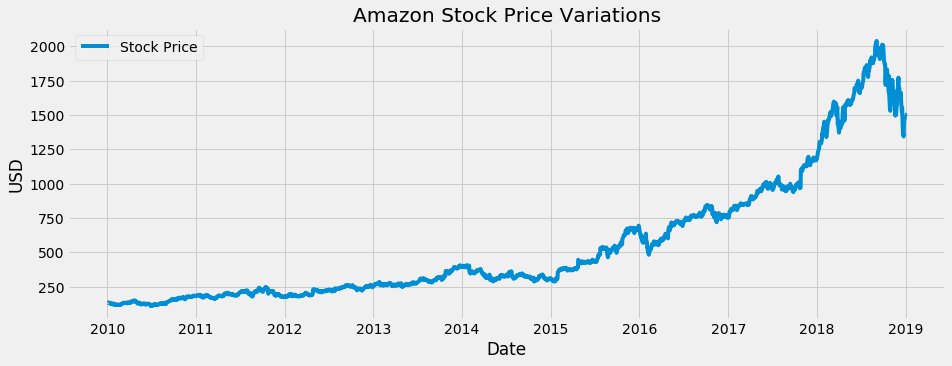

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(14, 5))
plt.plot(data['Date'], data['Close'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Amazon Stock Price Variations')
plt.legend(loc='best')
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
data_close = scaler.fit_transform(data_close)

In [13]:
#Training and testing data split
train_size = int(len(data_close) * 0.80)
test_size = len(data_close) - train_size
train, test = data_close[0:train_size,:], data_close[train_size:len(data_close),:]
print('Number of training samples:', len(train)) 
print('Number of testing samples:', len(test))

Number of training samples: 1812
Number of testing samples: 453


## Normalization 


In [14]:
#converting an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): #keeping only similar values, and jumping to the next value if values are too far apart
    dataX, dataY = [], []  
    for i in range(len(dataset)-look_back-1): #dataY holds only output values
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
#reshaping into X=t and Y=t+1
import numpy as np
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [18]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Building and compiling the model

In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten

model = Sequential()
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units = 1))
model.add(Activation('relu'))
model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [20]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=40,
    validation_split=0.05)

Epoch 1/40
14/14 [==============================] - 1s 105ms/step - loss: 0.0116 - mean_absolute_error: 0.0750 - val_mean_absolute_error: 0.2190 - val_loss: 0.0483
Epoch 2/40
14/14 [==============================] - 0s 9ms/step - loss: 0.0063 - mean_absolute_error: 0.0623 - val_mean_absolute_error: 0.1892 - val_loss: 0.0360
Epoch 3/40
14/14 [==============================] - 0s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0548 - val_mean_absolute_error: 0.1509 - val_loss: 0.0229
Epoch 4/40
14/14 [==============================] - 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0430 - val_mean_absolute_error: 0.1058 - val_loss: 0.0113
Epoch 5/40
14/14 [==============================] - 0s 8ms/step - loss: 0.0013 - mean_absolute_error: 0.0284 - val_mean_absolute_error: 0.0621 - val_loss: 0.0039
Epoch 6/40
14/14 [==============================] - 0s 9ms/step - loss: 4.8456e-04 - mean_absolute_error: 0.0161 - val_mean_absolute_error: 0.0166 - val_loss: 3.0242e-04
Epoch 7/40
14/14 

# Final Predictions and Evaluation

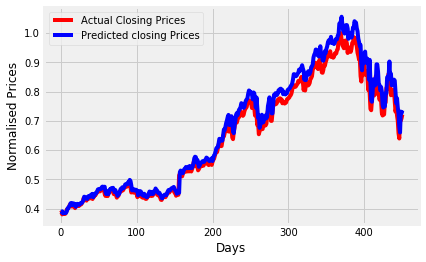

In [21]:
import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()

In [22]:
mae = model.evaluate(trainX,
    trainY,
    batch_size=128,verbose=1)

15/15 [==============================] - 0s 3ms/step - loss: 2.0236e-05 - mean_absolute_error: 0.0033
